In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as ipw

from numpy import random
from ipywidgets import interact
from matplotlib import animation
from IPython.display import HTML

# Chapter 1: Drude Model - Simulation and Analysis

## Theoretical Background

#### Drude model serves as one of the seminal models in solid state physics, offering insights into the behavior of electrons in metallic solids. The key premise lies in considering electrons as small solid particles moving through a lattice made up of stationary, heavier atoms. While the model might seem rudimentary, it provides fundamental insights into the electron dynamics in solids.

#### The concept of "mean free time" ($\tau$) is integral to the Drude model. It represents the average time taken by an electron before it encounters a scattering event, caused by lattice imperfections, phonons, or other electrons. The frequency with which these scatterings happen can dictate the macroscopic properties of the material, like its conductivity.

#### In the provided Jupyter notebook, the core constants essential to the simulation include:
- Elementary electron charge ($e$)
- (Bare) electron mass ($m$)
- Mean free time ($\tau$)
- $V_0$: Represents an average restarting velocity post-collision, introduced to simplify simulation dynamics.

#### Different scenarios or cases are designed in the simulation:
1. Solely focusing on the effects of the Electric field, with a short $\tau$.
2. A playground case mirroring case 1, but allowing user-driven modifications to variables.

#### The simulation uses a step-wise method to monitor electron behavior in a 2D material with limited width but infinite length. During each step, velocities and positions are updated based on the applied external electric and magnetic fields. The cumulative average of the x-direction velocity is computed and plotted alongside instantaneous velocities. This cumulative average, over time, should approach the drift velocity, a metric indicative of the material's conductivity in the context of the Drude model.


In [2]:
e = -1.602E-19;      # Electron charge (C)
m = 9.109E-31;       # (Bare) electron mass (kg)
v0 = 1;              # Average restarting velocity (m/s)
steps = 1000;         # number of updates to simulate

#### Now We setup up cases for easy switching in between with the cases corresponding to:
    1. Only Electric field with short mean free time.
    2. Duplicate of case 1 as a playground allowing adjustment to the variables.

In [3]:
# Set time step
global Ey,delta_T
delta_T = 1E-12;       # time step in seconds

case = 1;
if case == 1:
    num = 1;            # number of electrons to simulate
    tau = 5;         # Mean free time (ps)    
    Ex = 0;         # X component of the external electric field (V/m)
    Ey = 0;             # Y component of the external electric field (V/m)
    Bz = 0;             # Z component of the external magnetic field (T)
    yBnd = 3*num*5E-11; # physical boundry of the conductor in y direction
elif case == 2:
    num = 1;            # number of electrons to simulate
    tau = 15;           # Mean free time (ps)    
    Ex = -0.2;         # X component of the external electric field (V/m)
    Ey = 0;             # Y component of the external electric field (V/m)
    Bz = 0;          # Z component of the external magnetic field (T)
    yBnd = 3*num*5E-11; # physical boundry of the conductor in y direction
else:                   # Default setting
    num = 1;            # number of electrons to simulate
    tau = 10;           # Mean free time (ps)    
    Ex = -0.2;         # X component of the external electric field (V/m)
    Ey = 0;             # Y component of the external electric field (V/m)
    Bz = 1;          # Z component of the external magnetic field (T)
    yBnd = 3*num*5E-11; # physical boundry of the conductor in y direction

#### Next, base on the choice of the scenario, we initiate some containers to store variables in the simulation

In [4]:
global x, y, vxt, ayt
x = np.zeros(num);
x = np.expand_dims(x,axis=0);
y = random.rand(num)*yBnd-yBnd/2;
y = np.expand_dims(y,axis=0);

vx = np.ones(num);               # Initial velocity in x direction
vy = np.ones(num);               # Initial velocity in y direction
vxt = vx;                        # Instantaneous velocity in x-direction
vxt = np.expand_dims(vxt,axis=0);
axt = np.zeros(num);             # Acceleration in x-direction
axt = np.expand_dims(axt,axis=0);
ayt = np.zeros(num);             # Acceleration in y-direction
ayt = np.expand_dims(ayt,axis=0);
colors = [];                     # Color assignment to trace different electrons
for i in range(num):
    colors.append('#%06X' % random.randint(0, 0xFFFFFF))

#### Next we create the figure objects, and the function to call between each frame for simulation of each time step. In each step, we compute and plot the average velocity in x direction over the steps simulated so far on top of the instantaneous velocities. This mean velocity in x direction eventually should converges to a called drift velocity, which is an indirect measure of the conductivity/resistivity of materiasl in Drude model

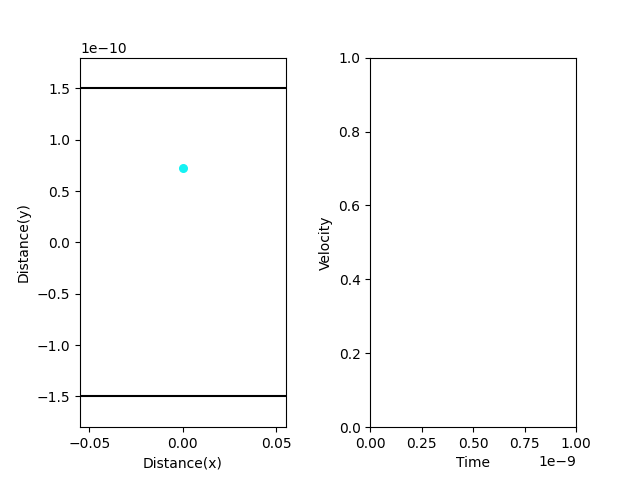

interactive(children=(FloatSlider(value=0.0, description='E-Field (x)', max=6.0), Output()), _dom_classes=('wi…

interactive(children=(FloatSlider(value=5.0, description='MFT (tau)', max=500.0, min=5.0, step=5.0), Output())…

In [5]:
# Create figure objects
figs = plt.figure();
ax1 = plt.subplot(1,7,(1,3));
plt.rcParams['figure.figsize'] = [10, 4];
init, = ax1.plot([],[],'ok', markersize = 5, zorder = 10);
end = ax1.scatter(x[0,:],y[0,:], c = colors[:], s = 30, marker = 'o', zorder = 10);
ax1.axhline(y = -yBnd, color = 'k');
ax1.axhline(y = yBnd, color = 'k');

ax1.set_ylim(-1.2*yBnd,1.2*yBnd);
ax1.set_xlabel('Distance(x)');
ax1.set_ylabel('Distance(y)');

ax3 = plt.subplot(1,7,(5,7))
ax3.set_xlabel('Time');
ax3.set_ylabel('Velocity');
ax3.set_xlim(0,steps*delta_T);

plt.show()

# Set the electrical field in x direction
def set_field(E):
    global Ex
    Ex = -E; # X component of the external electric field (V/m)
    return

# Set the mean free time
def set_time(T):
    global tau
    tau = T; # mean free time tau (ps)
    return

# Initialize the frame
def initf():
    init.set_data(x[0,:],y[0,:]);
    return init,

# Implement pause on click
anim_running = True
def onClick(event):
    global anim_running
    if anim_running:
        anim.event_source.stop()
        anim_running = False
    else:
        anim.event_source.start()
        anim_running = True

# Animation function which updates figure data.  This is called sequentially
def update(step,vx,vy,v0):
    global Ex,Ey,x,y,vxt,axt,delta_T,tau
    newX = np.zeros(num);
    newY = np.zeros(num);
    newVt = np.zeros(num);
    ax = np.zeros(num);
    ay = np.zeros(num);
    for nn in range(num):
        vx_old = vx[nn];                   # Use a temporary variable to store the previous value
        vy_old = vy[nn];                    # Use a temporary variable to store the previous value
        vx[nn] = vx[nn] + e*(Ex - Bz*vy_old)*delta_T/m;                      # Update the velocity
        vy[nn] = vy[nn] + e*(Ey + Bz*vx_old)*delta_T/m;                      # Update the velocity
        ax[nn] = (Ex + Bz*vy_old)*e/m;                                       # acceleration in x-direction
        #ay[nn] = (Ey + Bz*vx_old)*e/m;                                       # acceleration in y-direction
        newX[nn] = x[step-1][nn] + vx[nn]*delta_T;                           # Update the coordinate
        newY[nn] = y[step-1][nn] + vy[nn]*delta_T;                           # Update the coordinate
        if(random.rand() < 1/tau):
            theta = random.rand()*2*np.pi;                                   # pick a random angle in 2D
            vec = random.rand()*v0;
            vx[nn] = np.cos(theta)*vec;
            vy[nn] = np.sin(theta)*vec;
        # Restrict movements of the electrons in y-direction by a hard and elastic physical boundary
        if(newY[nn] > yBnd):
            newY[nn] = yBnd;
            vy[nn] = -np.absolute(vy[nn]);
        elif(newY[nn] < -yBnd):
            newY[nn] = -yBnd;
            vy[nn] = np.absolute(vy[nn]);
#         newVt[nn] = np.linalg.norm([vx[nn],vy[nn]]);

    x = np.concatenate((x, newX[None,:]), axis=0);                    # Append the new coordinate
    y = np.concatenate((y, newY[None,:]), axis=0);                    # Append the new coordinate
    vxt = np.vstack([vxt,vx]);                                        # Append the average of x-velocity of the current step
    axt = np.vstack([axt,ax]);                                        # Append the average of x-acceleration of the current step
    #ayt = np.vstack([ayt,ay]);                                        # Append the average of y-acceleration of the current step


    for ii in range(num):
#         ax1.plot(x[len(x)-1,ii], y[len(y)-1,ii], '.', markersize = 3, color = colors[ii], zorder = 0);
#         ax3.plot([xx*delta_T for xx in range(step+1)], vxt[:,ii], color = colors[ii], zorder = 0);

        ax1.plot(x[len(x)-1,ii], y[len(y)-1,ii], '.', markersize = 3, color = colors[ii], zorder = 0);
        ax3.plot([xx*delta_T for xx in range(step+1)], vxt[:,ii], color = colors[ii], zorder = 0);


    end.set_offsets(np.vstack((x[len(x)-1,:],y[len(y)-1,:])).T);
    
    ax3.plot(step*delta_T,np.mean(vxt),'.',markersize = 6,color = 'k', zorder = 10);
    lgd = np.append(['Vx']*num,'mean(Vx)');
    ax3.legend(lgd,loc='upper right');

    return end

# Call the animator.  blit=True means only re-draw the parts that have changed.
figs.canvas.mpl_connect('button_press_event', onClick)
anim = animation.FuncAnimation(figs, update, init_func=initf, fargs = (vx,vy,v0), frames=range(1,steps+1), interval=100, blit = True, repeat = False)
interact(set_field, E=ipw.FloatSlider(min=0, max=6, step=0.1, value=-Ex, description = 'E-Field (x)'));
interact(set_time, T=ipw.FloatSlider(min=5, max=500, step=5, value=tau, description = 'MFT (tau)'));


## Self-Education Questions:

1. What assumptions does the Drude model make about electrons and their environment?
2. Explain the significance of "mean free time" ($\tau$) in the Drude model. How does it influence material properties?
3. How does the Drude model account for the influence of external electric and magnetic fields on electron dynamics?
4. What is drift velocity and how does it relate to the conductivity of a material?
5. Why is $V_0$ introduced in the simulation? What does it represent in a real-world context?
6. How does changing the value of $\tau$ influence the behavior of electrons in the simulation? What real-world phenomena might this mimic?
7. Investigate and discuss the limitations of the Drude model. How have modern models built upon or diverged from its principles?
8. How would the introduction of more electrons in the simulation (i.e., increasing the 'num' parameter) potentially influence the results and their interpretation?
9. What impact might temperature have on mean free time and, subsequently, on the behavior of electrons in the Drude model?
#### Note: Clicking on figures allows to pause/unpause the simulation

#### Now as an exercise, you may try to investigate the dependence of the mean velocity on the applied electric field and/or the mean free time tau.
#### You could also find values in real materials for "Mean Free Time" and appropriate time step to run simulate again and see if you could find the right "Average Velocity" for electrons traveling in these materials. 

#### Thank you for using the notebook, please provide us with some feedbacks at your convenience by emailing to (yikai.yang@epfl.ch), (oleg.malanyuk@epfl.ch)